# Exploratory Data Analysis

This notebook will be used to explore the training data to explore and visualize relationships within the data

In [1]:
# Make the necessary imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import functions

In [2]:
# Set the Seaborn theme for the dataset
sns.set_theme(style = 'darkgrid')
sns.set(rc = {'figure.figsize':(12,9)})

In [3]:
# Load the data
data = pd.read_csv('Data/train.csv', 
                  low_memory = False)

In [5]:
# Check the shape of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9771 entries, 0 to 9770
Data columns (total 70 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   9771 non-null   int64  
 1   DNAtype      9771 non-null   int64  
 2   SpeciesID    9771 non-null   int64  
 3   Ncodons      9771 non-null   int64  
 4   SpeciesName  9771 non-null   object 
 5   UUU          9771 non-null   object 
 6   UUC          9771 non-null   object 
 7   UUA          9771 non-null   float64
 8   UUG          9771 non-null   float64
 9   CUU          9771 non-null   float64
 10  CUC          9771 non-null   float64
 11  CUA          9771 non-null   float64
 12  CUG          9771 non-null   float64
 13  AUU          9771 non-null   float64
 14  AUC          9771 non-null   float64
 15  AUA          9771 non-null   float64
 16  AUG          9771 non-null   float64
 17  GUU          9771 non-null   float64
 18  GUC          9771 non-null   float64
 19  GUA   

In [5]:
# Check out the first 5 rows of the dataset
data.sort_values(by = 'Ncodons', ascending = False).head()

,Unnamed: 0,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom
776,13026,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156,pri
7224,7000,0,311553,34132283,Oryza sativa,0.01307,0.02237,0.00615,0.01468,0.01517,...,0.01050,0.01595,0.02531,0.02811,0.02165,0.03855,0.00066,0.00084,0.00121,pln
391,12658,0,10090,24533776,Mus musculus,0.01721,0.02182,0.00673,0.01344,0.01344,...,0.01211,0.01221,0.02099,0.02603,0.02696,0.03937,0.00095,0.00078,0.00164,rod
4124,6906,0,29760,11557387,Vitis vinifera,0.02522,0.01863,0.01350,0.02506,0.02211,...,0.01859,0.01601,0.03491,0.01611,0.03236,0.03236,0.00059,0.00059,0.00090,pln
8992,9529,0,6239,11197796,Caenorhabditis elegans,0.02327,0.02391,0.00985,0.02002,0.02116,...,0.01543,0.00395,0.03580,0.01707,0.04084,0.02452,0.00158,0.00065,0.00143,inv


### Inspecting the label classes

The first thing I want to explore is the proportion of organisms belonging to each kingdom.  This will allow me to check for any potential class imbalances.

The kingdom labels present in the dataset correspond to the following: <br>
arc - Archaea <br>
bct - Bacteria <br>
phg - Bacteriophage <br>
plm - Plasmid <br>
pln - Plant <br>
inv - Invertebrate <br>
vrt - Vertebrate <br>
mam - Mammal <br>
rod - Rodent <br>
pri - Primate <br>
vri - Virus <br>

In [6]:
# Use the value_counts method to see the counts of each class in the dataset
kingdom_counts = data.Kingdom.value_counts()
kingdom_counts

bct    2193
vrl    2106
pln    1884
vrt    1585
inv     983
mam     446
phg     168
rod     158
pri     143
arc      93
plm      12
Name: Kingdom, dtype: int64

[Text(0.5, 0, 'Kingdom'),
 Text(0, 0.5, 'Sample Count'),
 Text(0.5, 1.0, 'Breakdown of Samples by Kindom Count')]

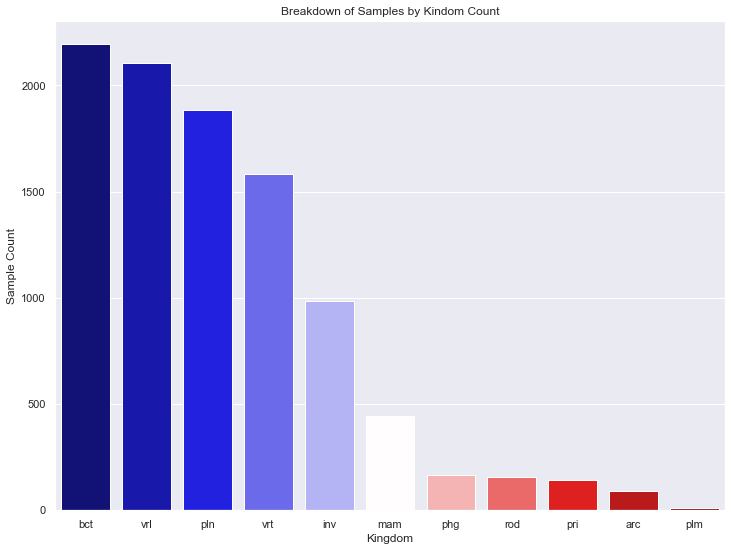

In [7]:
# Visualize the value_counts as a bar plot

ax = sns.barplot(x = kingdom_counts.index,
                y = kingdom_counts,
                palette = 'seismic')
ax.set(xlabel = 'Kingdom',
      ylabel = 'Sample Count',
      title = 'Breakdown of Samples by Kindom Count')

### Number of codons

How long are the sequences of each organism, what does this distribution look like?

In [8]:
data.describe()

,Unnamed: 0,DNAtype,SpeciesID,Ncodons,UUA,UUG,CUU,CUC,CUA,CUG,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,9771.000000,9771.00000,9771.000000,9.771000e+03,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,...,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000
mean,6544.025586,0.36680,130704.889162,7.794644e+04,0.020488,0.014074,0.017891,0.018362,0.019311,0.018388,...,0.005453,0.009839,0.006423,0.024092,0.021134,0.028183,0.021588,0.001642,0.000598,0.006254
std,3770.004099,0.67226,124893.476053,6.969568e+05,0.020461,0.009271,0.010595,0.014588,0.024510,0.016421,...,0.006657,0.008555,0.006407,0.013895,0.012999,0.014241,0.014945,0.001815,0.000939,0.010398
min,0.000000,0.00000,7.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3274.000000,0.00000,28946.500000,1.610000e+03,0.005610,0.007030,0.010960,0.007830,0.005380,0.007220,...,0.001200,0.001655,0.001140,0.012260,0.011880,0.017340,0.009650,0.000560,0.000000,0.000410
50%,6548.000000,0.00000,82116.000000,2.948000e+03,0.015290,0.013300,0.016130,0.014620,0.009780,0.012840,...,0.003520,0.009120,0.004530,0.025260,0.019020,0.026010,0.020560,0.001380,0.000420,0.001150
75%,9832.500000,1.00000,223280.500000,9.344000e+03,0.029290,0.019800,0.022855,0.025280,0.017475,0.024280,...,0.007080,0.015850,0.010295,0.034130,0.027690,0.036590,0.030940,0.002370,0.000830,0.002950
max,13027.000000,12.00000,463521.000000,4.066258e+07,0.141810,0.101190,0.089780,0.098470,0.160080,0.107370,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.120510,0.158550,0.044760,0.025610,0.106700


[(0.0, 150.0)]

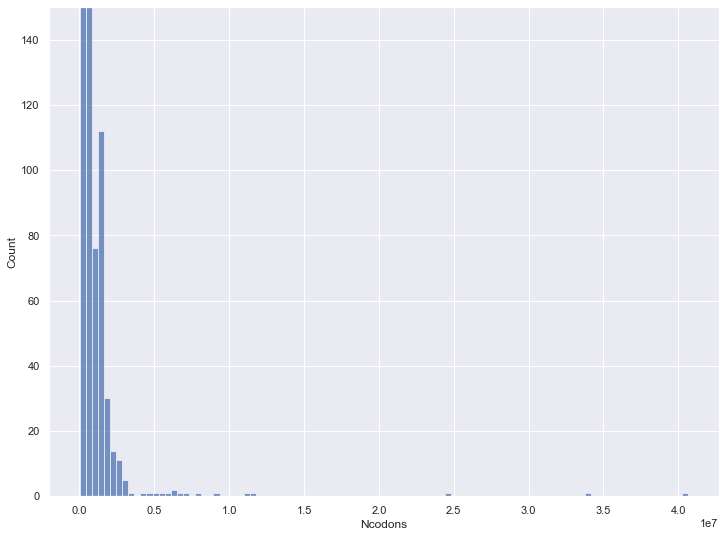

In [9]:
# Create a histogram showing the distribution of the number of codons in each sample
ax = sns.histplot(x = data['Ncodons'],
                bins = 100)
ax.set(ylim = (0, 150))

From the above figure, it is clear that the dataset is highly right-skewed.  Let's normalize it by log-scaling the data.

In [10]:
# Log-scale the Ncodons column
data['logNcodons'] = np.log(data['Ncodons'])

It is clear that there is still a significant skew to the data.  Let's compare the skewedness of the raw data to the log-transform.

In [11]:
print(f'The skewedness of the raw data is {data["Ncodons"].skew()}')
print(f'The skewedness of the log-transformed data is {data["logNcodons"].skew()}')

The skewedness of the raw data is 38.64520763612369
The skewedness of the log-transformed data is 1.8126322765268015


[(0.0, 150.0)]

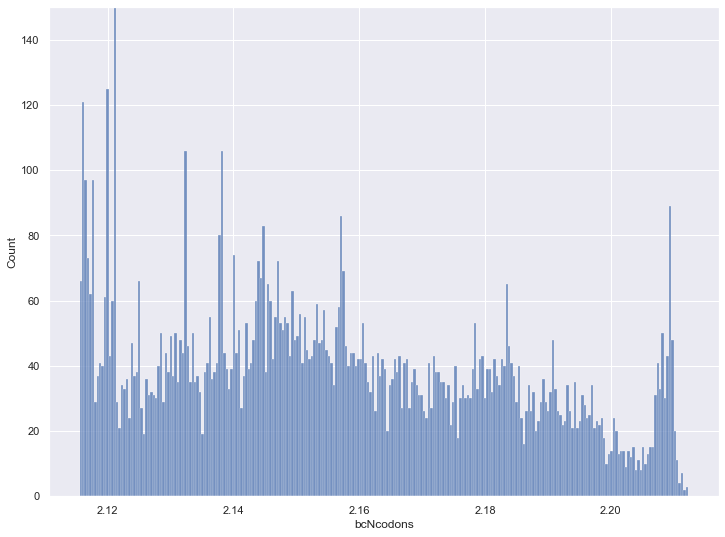

In [12]:
# Create a new histogram using the data resulting from a box-cox transformation

data['bcNcodons'] = stats.boxcox(data['Ncodons'])[0]
ax = sns.histplot(x = data['bcNcodons'],
                bins = 250)
ax.set(ylim = (0, 150))

### How does the number of codons vary by kingdom?

I want to see how effective retaining the number of codons as a feature will be at classifying a sample  (Genomic DNA, 'DNAtype' == 0).

In [13]:
king_codon = data[data['DNAtype']==0][['Ncodons','Kingdom']].groupby(by = ['Kingdom']).median()
king_codon

,Ncodons
Kingdom,
arc,12102.0
bct,7019.0
inv,3471.5
mam,2438.0
phg,2356.0
plm,16417.5
pln,3298.5
pri,2282.0
rod,3267.5


### What are the codons with the highest frequency in genomic DNA by kingdom?

In [14]:
# Strip all data columns not referring to codon frequency, group by kingdom

codon_frequency = data[data['DNAtype'] == 0].groupby('Kingdom').mean()
codon_frequency.drop(columns = ['Unnamed: 0', 'DNAtype',
                               'SpeciesID', 'Ncodons', 'logNcodons', 
                               'bcNcodons'],
                    inplace = True)
codon_frequency

,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA,AUG,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
Kingdom,,,,,,,,,,,,,,,,,,,,,
arc,0.017847,0.009687,0.017046,0.022648,0.009578,0.015528,0.022821,0.020992,0.030335,0.023125,...,0.005658,0.014677,0.016636,0.026078,0.030431,0.036436,0.038636,0.001452,0.000560,0.001446
bct,0.016562,0.013382,0.012444,0.015905,0.005964,0.029640,0.023445,0.025210,0.009615,0.022613,...,0.010233,0.006669,0.003612,0.029243,0.027889,0.035081,0.026568,0.001414,0.000553,0.001385
inv,0.010578,0.016914,0.013857,0.014451,0.006610,0.019334,0.021251,0.022398,0.010313,0.024634,...,0.003967,0.012116,0.007355,0.029534,0.026402,0.034089,0.028380,0.002192,0.000729,0.000776
mam,0.005177,0.011335,0.010663,0.024142,0.006696,0.040382,0.013345,0.027224,0.007210,0.025105,...,0.009472,0.010977,0.011866,0.016741,0.026143,0.023060,0.033869,0.000945,0.000896,0.001478
phg,0.015142,0.011878,0.018376,0.010283,0.007138,0.020493,0.029132,0.018467,0.009809,0.027042,...,0.005236,0.007633,0.004250,0.033865,0.023953,0.034740,0.024162,0.002448,0.000324,0.001976
plm,0.010043,0.014323,0.013869,0.012455,0.005763,0.037822,0.019501,0.025734,0.007732,0.025314,...,0.012712,0.004371,0.004328,0.026150,0.027629,0.034253,0.026992,0.001521,0.000670,0.001870
pln,0.008157,0.018135,0.018775,0.020300,0.007211,0.015942,0.021202,0.023640,0.008831,0.024201,...,0.004879,0.010247,0.009253,0.028065,0.025564,0.024702,0.032758,0.001041,0.000663,0.000950
pri,0.005535,0.010337,0.010865,0.027545,0.006484,0.049498,0.014943,0.028637,0.006774,0.023784,...,0.011213,0.011748,0.012866,0.015465,0.021955,0.019993,0.032833,0.000874,0.000626,0.002139
rod,0.005972,0.013309,0.013214,0.023555,0.007205,0.044541,0.014679,0.025972,0.006646,0.023459,...,0.008660,0.010800,0.010875,0.019229,0.025663,0.024360,0.034098,0.000833,0.000637,0.001698


In [15]:
# Check that the frequencies sum to approximately 1

codon_frequency['sum'] = codon_frequency.sum(axis = 1)
codon_frequency

,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA,AUG,...,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,sum
Kingdom,,,,,,,,,,,,,,,,,,,,,
arc,0.017847,0.009687,0.017046,0.022648,0.009578,0.015528,0.022821,0.020992,0.030335,0.023125,...,0.014677,0.016636,0.026078,0.030431,0.036436,0.038636,0.001452,0.000560,0.001446,0.960134
bct,0.016562,0.013382,0.012444,0.015905,0.005964,0.029640,0.023445,0.025210,0.009615,0.022613,...,0.006669,0.003612,0.029243,0.027889,0.035081,0.026568,0.001414,0.000553,0.001385,0.961727
inv,0.010578,0.016914,0.013857,0.014451,0.006610,0.019334,0.021251,0.022398,0.010313,0.024634,...,0.012116,0.007355,0.029534,0.026402,0.034089,0.028380,0.002192,0.000729,0.000776,0.958764
mam,0.005177,0.011335,0.010663,0.024142,0.006696,0.040382,0.013345,0.027224,0.007210,0.025105,...,0.010977,0.011866,0.016741,0.026143,0.023060,0.033869,0.000945,0.000896,0.001478,0.957383
phg,0.015142,0.011878,0.018376,0.010283,0.007138,0.020493,0.029132,0.018467,0.009809,0.027042,...,0.007633,0.004250,0.033865,0.023953,0.034740,0.024162,0.002448,0.000324,0.001976,0.960117
plm,0.010043,0.014323,0.013869,0.012455,0.005763,0.037822,0.019501,0.025734,0.007732,0.025314,...,0.004371,0.004328,0.026150,0.027629,0.034253,0.026992,0.001521,0.000670,0.001870,0.962780
pln,0.008157,0.018135,0.018775,0.020300,0.007211,0.015942,0.021202,0.023640,0.008831,0.024201,...,0.010247,0.009253,0.028065,0.025564,0.024702,0.032758,0.001041,0.000663,0.000950,0.958056
pri,0.005535,0.010337,0.010865,0.027545,0.006484,0.049498,0.014943,0.028637,0.006774,0.023784,...,0.011748,0.012866,0.015465,0.021955,0.019993,0.032833,0.000874,0.000626,0.002139,0.951650
rod,0.005972,0.013309,0.013214,0.023555,0.007205,0.044541,0.014679,0.025972,0.006646,0.023459,...,0.010800,0.010875,0.019229,0.025663,0.024360,0.034098,0.000833,0.000637,0.001698,0.955537


[Text(0.5, 57.5, 'Codon'),
 Text(84.5, 0.5, 'Kingdom'),
 Text(0.5, 1.0, 'Codon Utilization by Kingdom')]

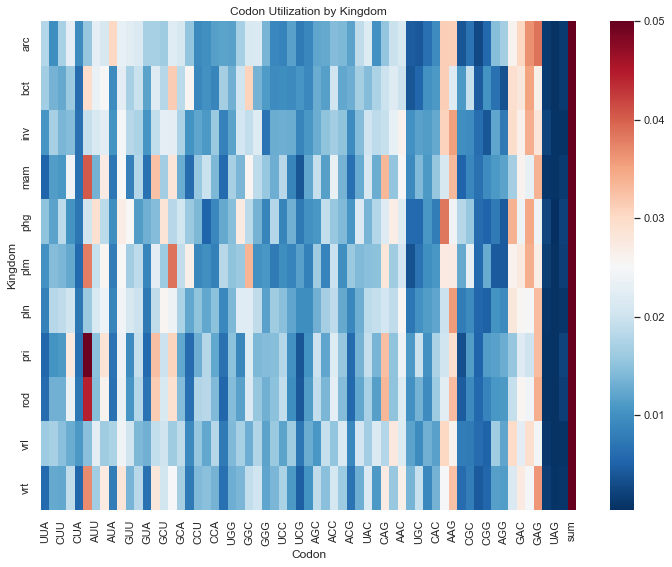

In [16]:
# Build a heatmap comparing codon frequency by kingdom

ax = sns.heatmap(data = codon_frequency,
                vmax = 0.05,
                cmap = 'RdBu_r')
ax.set(xlabel = 'Codon',
      ylabel = 'Kingdom',
      title = 'Codon Utilization by Kingdom')

### Let's translate the codons to their corresponding amino acids.

Function written to perform this task in the functions.py file of the project.  

In [17]:
# Rename the columns using the codon to amino acid mapping provided by the translation dictionary

AA_frequency = codon_frequency.rename(mapper = functions.translation, 
                                    axis = 1)

# Merge duplicate columns 
AA_frequency = AA_frequency.groupby(lambda x:x, axis = 1).sum()

AA_frequency

,Ala,Arg,Asn,Asp,Cys,Gln,Glu,Gly,His,Ile,...,Lys,Met,Pro,Ser,Stop,Thr,Trp,Tyr,Val,sum
Kingdom,,,,,,,,,,,,,,,,,,,,,
arc,0.074788,0.050550,0.040866,0.056509,0.008610,0.025535,0.075072,0.073146,0.016122,0.074148,...,0.062418,0.023125,0.042670,0.057925,0.003459,0.052835,0.011710,0.040628,0.077682,0.960134
bct,0.093674,0.055355,0.041834,0.057131,0.009492,0.037005,0.061649,0.075727,0.020947,0.058269,...,0.053267,0.022613,0.044647,0.061154,0.003352,0.057023,0.013187,0.031095,0.070408,0.961727
inv,0.072919,0.049017,0.049228,0.055936,0.021725,0.038186,0.062470,0.068329,0.023839,0.053962,...,0.066219,0.024634,0.047381,0.071090,0.003697,0.056420,0.011949,0.034623,0.065396,0.958764
mam,0.063785,0.052953,0.040447,0.042884,0.023664,0.046174,0.056929,0.073860,0.026520,0.047778,...,0.054169,0.025105,0.055306,0.075551,0.003320,0.054654,0.016856,0.033646,0.065387,0.957383
phg,0.083180,0.056833,0.049115,0.057818,0.011369,0.039847,0.058902,0.067792,0.018518,0.057408,...,0.062533,0.027042,0.040639,0.068018,0.004748,0.059521,0.014643,0.035017,0.063862,0.960117
plm,0.100705,0.062586,0.036982,0.053779,0.010437,0.043231,0.061246,0.070224,0.020494,0.052968,...,0.054654,0.025314,0.045124,0.061930,0.004061,0.054067,0.015211,0.028921,0.066573,0.962780
pln,0.079179,0.047087,0.044290,0.053629,0.017357,0.039778,0.057461,0.074910,0.023377,0.053673,...,0.055581,0.024201,0.051596,0.075692,0.002654,0.056652,0.013941,0.031369,0.067111,0.958056
pri,0.068884,0.055574,0.038811,0.037421,0.030397,0.046234,0.052826,0.059342,0.027520,0.050355,...,0.049578,0.023784,0.050038,0.076651,0.003639,0.055354,0.015045,0.032569,0.067365,0.951650
rod,0.071188,0.049823,0.037094,0.044892,0.023512,0.044900,0.058459,0.061984,0.025702,0.047296,...,0.055280,0.023459,0.055810,0.078038,0.003167,0.056715,0.014304,0.029356,0.066761,0.955537


In [18]:
# Get some descriptive stats for the resulting amino acid table
AA_frequency.drop('sum',
                 axis = 1,
                 inplace = True)
AA_frequency.describe()

,Ala,Arg,Asn,Asp,Cys,Gln,Glu,Gly,His,Ile,Leu,Lys,Met,Pro,Ser,Stop,Thr,Trp,Tyr,Val
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.076587,0.052859,0.042780,0.051037,0.019190,0.039876,0.059952,0.068167,0.022766,0.054874,0.093512,0.057033,0.024695,0.048693,0.070640,0.003466,0.057008,0.014004,0.033537,0.067600
std,0.011774,0.004807,0.004707,0.006683,0.008465,0.005799,0.005907,0.006044,0.003493,0.007323,0.009114,0.004827,0.001700,0.005099,0.007231,0.000610,0.003339,0.001490,0.003430,0.003710
min,0.063785,0.046578,0.036982,0.037421,0.008610,0.025535,0.052826,0.059342,0.016122,0.047296,0.081743,0.049578,0.022613,0.040639,0.057925,0.002539,0.052835,0.011710,0.028921,0.063862
25%,0.069226,0.049420,0.039629,0.046974,0.010903,0.038196,0.057195,0.063497,0.020721,0.050956,0.087526,0.054412,0.023622,0.044886,0.064974,0.003243,0.055004,0.013136,0.031232,0.065940
50%,0.072919,0.052953,0.041834,0.053629,0.021415,0.039778,0.058902,0.068329,0.023377,0.053673,0.092335,0.055581,0.024201,0.048883,0.074926,0.003459,0.056652,0.014109,0.033646,0.066573
75%,0.081180,0.055465,0.046702,0.056222,0.023588,0.044065,0.061447,0.073503,0.025290,0.056802,0.096335,0.059870,0.025209,0.052564,0.075876,0.003668,0.057814,0.014844,0.034824,0.067238
max,0.100705,0.062586,0.049537,0.057818,0.033107,0.046234,0.075072,0.075727,0.027520,0.074148,0.110263,0.066219,0.028305,0.055810,0.078038,0.004748,0.065239,0.016856,0.040628,0.077682


[Text(0.5, 57.453125, 'Amino Acid'),
 Text(84.5, 0.5, 'Kingdom'),
 Text(0.5, 1.0, 'Amino Acid Utilization by Kingdom')]

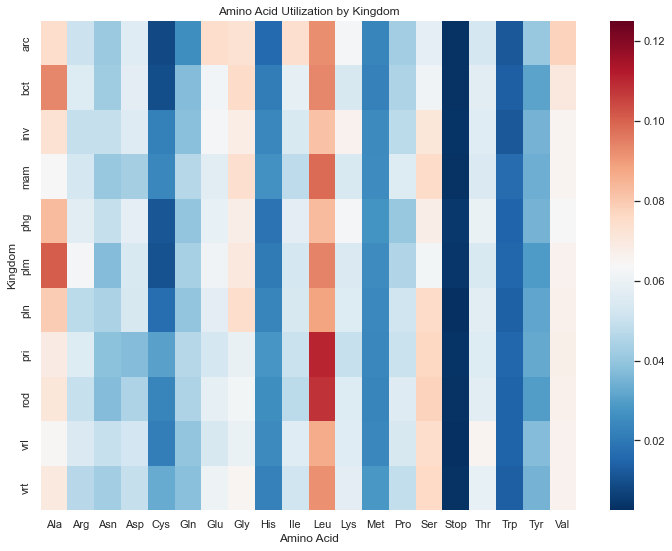

In [19]:
# Create a heatmap to explore the ultilization of different amino acids across the kingdoms

ax = sns.heatmap(data = AA_frequency,
                vmax = 0.125,
                cmap = 'RdBu_r')
ax.set(xlabel = 'Amino Acid',
      ylabel = 'Kingdom',
      title = 'Amino Acid Utilization by Kingdom')